<a href="https://colab.research.google.com/github/jmmrcp/TFM/blob/main/new_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive

# Unmount the drive first, if it's already mounted
# !fusermount -u /content/drive  # Use this command to unmount the drive

# Mount the drive with authentication
# drive.mount('/content/drive', force_remount=True)  # Force remount to override potential conflicts

# Importaciones

In [219]:

import pandas as pd
import numpy as np
import plotly.express as px
import nltk
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

In [221]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset

In [4]:
%%time
!gdown 1-MM_7TMiBysjdc9eOIcfqOHh9pddaimK

Downloading...
From (original): https://drive.google.com/uc?id=1-MM_7TMiBysjdc9eOIcfqOHh9pddaimK
From (redirected): https://drive.google.com/uc?id=1-MM_7TMiBysjdc9eOIcfqOHh9pddaimK&confirm=t&uuid=15ea9c06-4818-4c44-8531-ef77c9e3ecc7
To: /content/2.csv
100% 107M/107M [00:03<00:00, 34.2MB/s]
CPU times: user 241 ms, sys: 8.64 ms, total: 249 ms
Wall time: 7.5 s


In [145]:
# Cargamos el dataset
df = pd.read_csv("/content/drive/MyDrive/DATA/datasets/dataset_0.25.csv")

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53795 entries, 0 to 53794
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  53795 non-null  object
 1   label    53795 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 840.7+ KB


In [147]:
df["No_of_Characters"] = df['message'].apply(len)

In [148]:
qs = df['No_of_Characters'].quantile([0.25, 0.5, 0.75]).values
q1 = qs[0]
q2 = qs[1]
q3 = qs[2]

iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"q1: {q1}")
print(f"lower_bound: {lower_bound}")
print(f"upper_bound: {upper_bound} \n")

fig = px.scatter(df, y = "No_of_Characters", width = 1200, height = 350)
fig.add_hline(y = lower_bound, line_color = "yellow", annotation_text='$q_{l}$')
fig.add_hline(y = q1, line_color = "red", annotation_text='$q_{1}$')
fig.add_hline(y = q2, line_color = "black", annotation_text='$q_{2}$')
fig.add_hline(y = q3, line_color = "red", annotation_text='$q_{3}$')
fig.add_hline(y = upper_bound, line_color = "yellow", annotation_text='$q_{u}$')
fig.show()

q1: 352.0
lower_bound: -1722.5
upper_bound: 3809.5 



In [149]:
df = df[(df['No_of_Characters'] > q1) & (df['No_of_Characters'] < upper_bound)]

In [150]:
fig = px.scatter(df, y = "No_of_Characters", width = 1200, height = 350)
fig.add_hline(y = lower_bound, line_color = "yellow", annotation_text='$q_{l}$')
fig.add_hline(y = q1, line_color = "red", annotation_text='$q_{1}$')
fig.add_hline(y = q2, line_color = "black", annotation_text='$q_{2}$')
fig.add_hline(y = q3, line_color = "red", annotation_text='$q_{3}$')
fig.add_hline(y = upper_bound, line_color = "yellow", annotation_text='$q_{u}$')
fig.show()

In [151]:
fig = px.box(df, y = "No_of_Characters", width = 600, height = 400)
fig.show()

In [152]:
mean = df['No_of_Characters'].mean()
std = df['No_of_Characters'].std()
inf = mean - 3 * std
sup = mean + 3 * std
fig = px.histogram(df, x = "No_of_Characters", width = 800, height = 400)
fig.add_vline(x = mean, line_color = "black", annotation_text='$\mu$')
fig.add_vline(x = inf, line_color = "red", annotation_text='$\mu-3\sigma$')
fig.add_vline(x = sup, line_color = "red", annotation_text='$\mu-3\sigma$')
fig.show()

In [153]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in message is 35707
No. of unique values in label is 2
No. of unique values in No_of_Characters is 3346


# Comprobaciones

In [154]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 35707 entries, 1 to 53792
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   message           35707 non-null  object
 1   label             35707 non-null  int64 
 2   No_of_Characters  35707 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB
None


In [155]:
print(df.shape)

(35707, 3)


In [156]:
print(df.isnull().sum())

message             0
label               0
No_of_Characters    0
dtype: int64


In [157]:
if df.duplicated().sum():
  print(f"Hay {df.duplicated().sum():4.f} duplicados, que se eliminarán ahora.")
  df.drop_duplicates(inplace=True)

else:
  print("No hay duplicados")

No hay duplicados


In [158]:
# Muestra las lineas con falta de contenido.
valuesrows_with_nan = df[df.isnull().any(axis=1)] #View the rows with NaN valuesprint(rows_with_nan)
print(valuesrows_with_nan)

Empty DataFrame
Columns: [message, label, No_of_Characters]
Index: []


In [159]:
if df.isnull().values.any():  # Check if any value in the DataFrame is null
  print(df.isnull().sum())  # Print the number of null values in each column
  df.dropna(inplace=True)

else:
  print("No hay valores nulos")

No hay valores nulos


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35707 entries, 1 to 53792
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   message           35707 non-null  object
 1   label             35707 non-null  int64 
 2   No_of_Characters  35707 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [161]:
# Rename the column
df = df.rename(
    columns={
        "label": "target",
        "message": "features",
        }
    )

In [162]:
ham = df['target'].value_counts()
print(ham)

target
0    18470
1    17237
Name: count, dtype: int64


In [98]:
# df_phishing = df[df['target'] == 1].sample(n=8000)
df_phishing = df[df['target'] == 1]

In [99]:
df_ham = df[df['target'] == 0]

In [100]:
df = pd.concat([df_ham, df_phishing])

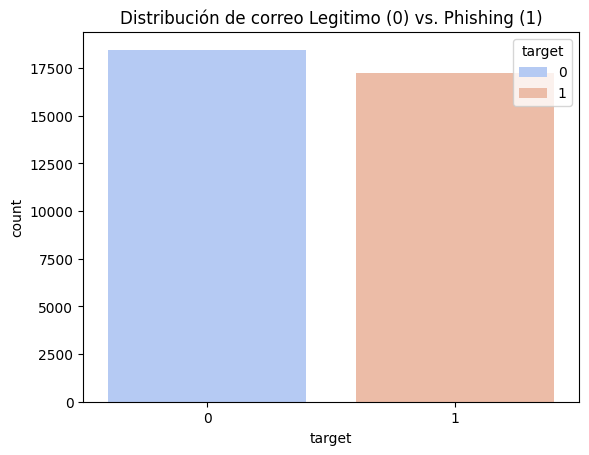

In [163]:
# Distribution of the label column
sns.countplot(
    x = 'target',
    hue = 'target',
    data = df,
    palette = "coolwarm",
    )
plt.title('Distribución de correo Legitimo (0) vs. Phishing (1)')
plt.show()

https://www.kaggle.com/code/karnikakapoor/spam-or-ham-sms-classifier

# Limpieza

In [195]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"re :": "response ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring'
}

In [196]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [197]:
def escape(text):
  # Diccionario de caracteres de escape de HTML comunes y sus reemplazos
    escape_chars = {
        "&nbsp": " ",
        "&lt": "<",
        "&gt": ">",
        "&amp": "&",
        "&quot": "\"",
        "&#39": "'",
        "=21": "!",
        "=2E": ".",
        "=3D": "=",
        "=2C": ",",
        "=3A": ":",
        "=2F": "/",
        "=3F": "?",
        "=26": "&",
        "=25": "%",
        "=23": "#",
        "=22": "\"",
        "=27": "'",
        "=20": " ",
        "=0A": "\n",
        "=0D": "\r",
        "=C2=A9": "©",
        "=C2=AE": "®",
        "=C2=B0": "°",
        "=C2=B1": "±",
        "=C3=80": "À",
        "=C3=81": "Á",
        "=C3=82": "Â",
        "=C3=83": "Ã",
        "=C3=84": "Ä",
        "=C3=85": "Å",
        "=C3=86": "Æ",
        "=C3=87": "Ç",
        "=C3=88": "È",
        "=C3=89": "É",
        "=C3=8A": "Ê",
        "=C3=8B": "Ë",
        "=C3=8C": "Ì",
        "=C3=8D": "Í",
        "=C3=8E": "Î",
        "=C3=8F": "Ï",
        "=C3=90": "Ð",
        "=C3=91": "Ñ",
        "=C3=92": "Ò",
        "=C3=93": "Ó",
        "=C3=94": "Ô",
        "=C3=95": "Õ",
        "=C3=96": "Ö",
        "=C3=97": "×",
        "=C3=98": "Ø",
        "=C3=99": "Ù",
        "=C3=9A": "Ú",
        "=C3=9B": "Û",
        "=C3=9C": "Ü",
        "=C3=9D": "Ý",
        "=C3=9E": "Þ",
        "=C3=9F": "ß",
        "=C3=A0": "à",
        "=C3=A1": "á",
        "=C3=A2": "â",
        "=C3=A3": "ã",
        "=C3=A4": "ä",
        "=C3=A5": "å",
        "=C3=A6": "æ",
        "=C3=A7": "ç",
        "=C3=A8": "è",
        "=C3=A9": "é",
        "=C3=AA": "ê",
        "=C3=AB": "ë",
        "=C3=AC": "ì",
        "=C3=AD": "í",
        "=C3=AE": "î",
        "=C3=AF": "ï",
        "=C3=B0": "ð",
        "=C3=B1": "ñ",
        "=C3=B2": "ò",
        "=C3=B3": "ó",
        "=C3=B4": "ô",
        "=C3=B5": "õ",
        "=C3=B6": "ö",
        "=C3=B7": "÷",
        "=C3=B8": "ø",
        "=C3=B9": "ù",
        "=C3=BA": "ú",
        "=C3=BB": "û",
        "=C3=BC": "ü",
        "=C3=BD": "ý",
        "=C3=BE": "þ",
        "=C3=BF": "ÿ"
    }

    # Reemplazar los caracteres de escape de HTML
    for escape_seq, char in escape_chars.items():
        text = text.replace(escape_seq, char)

    # Eliminar cualquier otro carácter de escape HTML
    text = re.sub(r'=\s*', '', text)
    return text

In [198]:
def numeros(text):
  return re.sub(r'\d+', 'NUM', text)

In [199]:
def unir_cantidades(texto, separador_miles=","):
  """Une las cantidades separadas por comas en un texto, considerando espacios y formatea correctamente.

  Args:
    texto: El texto donde se buscarán las cantidades.
    separador_miles: El carácter utilizado como separador de miles (por defecto ",").

  Returns:
    Una cadena con las cantidades unidas y formateadas correctamente.
  """

  # Patrón flexible para buscar cantidades con diferentes formatos
  patron = r"([$€]\s*\d+\s*[" + separador_miles + "]\s*\d+(?:\.\d+)?)"

  # Buscar todas las coincidencias en el texto
  coincidencias = re.findall(patron, texto)

  for coincidencia in coincidencias:
    # Eliminar espacios, convertir coma a punto y ajustar separador de miles
    cantidad_formateada = coincidencia.replace(" ", "").replace(",", ".").replace(separador_miles, ",")
    texto = texto.replace(coincidencia, cantidad_formateada)

  return texto

In [200]:
def lines(text):
  """

  Args:
    text:

  Returns:

  """
    # Remove unnecessary lines:
  lines = [line for line in text.splitlines() if not line.isspace()]

  # Combine lines:
  return " ".join(lines)

In [201]:
def emails(text):
  """

  Args:
    text:

  Returns:

  """
  # Expresión regular para encontrar direcciones de correo electrónico
  email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
  # Buscar todas las direcciones de correo en el texto
  emails = re.findall(email_pattern, text)
  # Eliminar las direcciones de correo duplicadas
  emails = list(set(emails))
  return emails

In [202]:
def set_url(urls,text):
  """

  Args:
    text:
  """
  for url in urls:
    text = text.replace(url, "URL")
  return text

In [203]:
def set_email(emails,text):
  """

  Args:
    text:
  """
  for email in emails:
    text = text.replace(email, "MAIL")
  return text

In [204]:
def slash(text):
  """

  Args:
    text:
  """
  # patron = r"(\w+)/(\w+)"
  # text = re.sub(patron, r"\1 \2", text)
  return text.replace("/", " ")

In [205]:
def spaces(text):
  """

  Args:
    text:
  """
  # Eliminar espacios y nuevas líneas adicionales
  # text = re.sub(r'\s*\n\s*', ' ', text)
  # text = re.sub(r'=\s*', ' ', text)
  # re.sub(r'\s+', ' ', text).strip()
  # re.sub(r'\s+', ' ', text)
  # Remove leading/trailing empty lines
  return re.sub(r'\s+', ' ', text, flags=re.MULTILINE).strip()


In [206]:
def special_characters(text):
  """

  Args:
    text:
  """
  # Eliminar caracteres especiales
  # patron_puntuacion = r'[]'
  patron_puntuacion = r'[^\w\s]'
  # cleaned_text = cleaned_text.translate(str.maketrans('', '', string.punctuation))
  # cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
  return re.sub(patron_puntuacion, ' ', text)

In [207]:
def divide(text):
  """

  Args:
    text:
  """
  # Eliminar stopwords
  words = word_tokenize(text.lower())
  # Lematizer

  return [WordNetLemmatizer().lemmatize(word) for word in [word for word in words if word not in nltk.corpus.stopwords.words('english')]]

In [208]:
def urls(text):
  """

  Args:
    text:

  Returns:

  """
  # Extract URLs:
  url_pattern = re.compile(r'(?:https?|ftp|ftps)://[-a-zA-Z0-9./?=%&_#]+|(?:[a-zA-Z0-9]+\.)+[a-zA-Z]+')

  urls = url_pattern.findall(text)

  # Remove URLs from the text:
  for url in urls:
    text = text.replace(url, "")
  return urls

In [209]:
def interlines(text):
  """Elimina líneas en blanco y líneas con muy poco contenido de un texto.

  Args:
    texto: El texto del que se quieren eliminar las líneas.

  Returns:
    Una cadena de texto sin las líneas intermedias.
  """

  # Eliminar líneas completamente en blanco
  text = re.sub(r'\n+', '\n', text)
  text = re.sub(r'^\s+|\s+$', '', text, flags=re.MULTILINE)
  text = text.replace('\r\n', '\n')
  text = re.sub(r'(?<=[.;])(?=[^\s])', ' ', text)

  # Eliminar líneas con muy poco contenido (ajusta el patrón según tus necesidades)
  # Combinar líneas en blanco consecutivas
  return text

In [210]:
def trash(texto, caracteres_a_eliminar='''[^a-zA-Z0-9.,$:;?'" ]/'''):
  """Elimina los caracteres especiales de un texto.

  Args:
    texto: El texto del que se quieren eliminar los caracteres especiales.
    caracteres_a_eliminar: Una expresión regular que define los caracteres a eliminar.
                           Por defecto, elimina todos excepto letras, números y espacios.

  Returns:
    Una cadena de texto sin los caracteres especiales especificados.
  """

  texto_limpio = re.sub(caracteres_a_eliminar, '', texto)
  return texto_limpio

In [211]:
def eliminar_repetidos(texto):
  """Elimina caracteres repetidos consecutivos en un texto.

  Args:
    texto: La cadena de texto donde se buscarán y eliminarán las repeticiones.

  Returns:
    Una nueva cadena con los caracteres repetidos eliminados.
  """

  # Expresión regular para encontrar uno o más caracteres repetidos
  pattern = r'(?<!\d)(.)\1+'

  # Reemplazar las coincidencias con el primer grupo capturado (un solo carácter)
  resultado = re.sub(pattern, r'\1', texto)
  return resultado

In [277]:
def crear_datasets(X, y, test_size=0.3, ):
  """
  Crea conjuntos de datos de entrenamiento, validación y prueba a partir de un conjunto de datos X e y.

  Args:
    X: Conjunto de datos de características.
    y: Conjunto de datos de etiquetas.
    test_size: Proporción del conjunto de datos a utilizar como conjunto de prueba.
    random_state: Semilla aleatoria para garantizar la reproducibilidad.

  Returns:
    X_train, X_val, X_test, y_train, y_val, y_test: Conjuntos de datos divididos.
  """
  # Crear el subconjunto (sin repetición)
  X_train, X_temp, y_train, y_temp = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    stratify=y,
                                                    #shuffle=False,
                                                  )

  # Dividir el conjunto restante en test y validación
  X_val, X_test, y_val, y_test = train_test_split(X_temp,
                                                    y_temp,
                                                    test_size=0.5
                                                  )

  return X_train, X_val, X_test, y_train, y_val, y_test



In [213]:
def clean(row):
  """
  This function cleans the text by removing unnecessary lines and extracts URLs.

  Args:
      text: The text string to clean.

  Returns:
      A dictionary containing:
          cleaned_text: The cleaned text string.
          urls: A list of extracted URLs.
  """
  text = row['features']  # Extract the 'body' text from the row

  # Extract emails
  correos = emails(text)
  if len(correos) > 0:
    correo = 1
    text = set_email(correos, text)
  else:
    correo = 0

  # Extract URLs
  enlaces = urls(text)
  if len(enlaces) > 0:
    enlace = 1
    # text = set_url(enlaces, text)
  else:
    enlace = 0

  text = cont_to_exp(text)

  # Eliminar caracteres especiales
  final_text = special_characters(text)

  # Unir cantidades
  text = numeros(text)
  # final_text = unir_cantidades

  # Dividir el texto en palabras
  final_text = " ".join(divide(spaces(final_text)))

  # Remove escape characters
  text = escape(text)
  # text = eliminar_repetidos(text)

  # Remove unnecessary lines
  text = interlines(text)

  cleaned_text = trash(text)

  # Remove unnecessary lines
  # text = lines(text)

  # Remove slashes
  cleaned_text = slash(cleaned_text)

  # Remove spaces
  cleaned_text = spaces(cleaned_text)

  # Eliminar caracteres especiales
  final_text = special_characters(text)

  # Dividir el texto en palabras
  final_text = " ".join(divide(spaces(final_text)))

  #Adding a column of numbers of charachters,words and sentences in each msg
  No_of_Characters = len(cleaned_text)
  No_of_Words = len(nltk.word_tokenize(cleaned_text))
  No_of_Sentence = len(nltk.sent_tokenize(cleaned_text))

  # Combine cleaned text and URLs:
  return {
      "llm": cleaned_text,
      "ml": final_text,
      "url": enlace,
      "mail": correo,
      "No_of_Characters": No_of_Characters,
      "No_of_Words": No_of_Words,
      "No_of_Sentence": No_of_Sentence,
      }
  # return cleaned_text, final_text,enlace,correo


In [214]:
text = df.iloc[12000]

In [215]:
df.iloc[12000, 0]

"CNN Alerts: My Custom Alert \n\nCNN Alerts: My Custom Alert\n\n\n\n\n\n\n \n\n\n\nAlert Name: My Custom Alert\nLedger's joker withdrawn from Oscar race\n\nFri, 8 Aug 2008 14:43:52 +0400\n\nFULL STORY\n\n\n\nYou have agreed to receive this email from CNN.com as a result of your CNN.com preference settings.\nTo manage your settings click here.\nTo alter your alert criteria or frequency or to unsubscribe from receiving custom email alerts, click here.\n\n\nCable News Network. One CNN Center, Atlanta, Georgia 30303\nÂ© 2008 Cable News Network.\nA Time Warner Company\nAll Rights Reserved.\nView our privacy policy and terms.\n\n\n\n\n\n\n"

In [222]:
print("ORIGINAL TEXT:")
print(text['features'])
print(30*'-')
cleaned_data = clean(text)

print("CLEANED TEXT:")
print(cleaned_data["llm"])

print("FINAL TEXT:")
print(cleaned_data["ml"])


ORIGINAL TEXT:
CNN Alerts: My Custom Alert 

CNN Alerts: My Custom Alert






 



Alert Name: My Custom Alert
Ledger's joker withdrawn from Oscar race

Fri, 8 Aug 2008 14:43:52 +0400

FULL STORY



You have agreed to receive this email from CNN.com as a result of your CNN.com preference settings.
To manage your settings click here.
To alter your alert criteria or frequency or to unsubscribe from receiving custom email alerts, click here.


Cable News Network. One CNN Center, Atlanta, Georgia 30303
Â© 2008 Cable News Network.
A Time Warner Company
All Rights Reserved.
View our privacy policy and terms.







------------------------------
CLEANED TEXT:
CNN Alerts: My Custom Alert CNN Alerts: My Custom Alert Alert Name: My Custom Alert Ledger's joker withdrawn from Oscar race Fri, NUM Aug NUM NUM:NUM:NUM +NUM FULL STORY You have agreed to receive this email from CNN. com as a result of your CNN. com preference settings. To manage your settings click here. To alter your alert criteria 

# Procesamiento de los datos

In [ ]:
df = df [['features','target']]

In [ ]:
def preproceso(df):
    new_rows = []
    for index, row in df.iterrows():
        data = clean(row)
        # Include the original index to avoid duplicate index values
        new_rows.append(
            {
            'llm': data['llm'],
            'ml': data['ml'],
            'url':data['url'],
            'mail':data['mail'],
            'No_of_Characters':data['No_of_Characters'],
            'No_of_Words':data['No_of_Words'],
            'No_of_Sentence':data['No_of_Sentence'],
            'original_index': index,
            #'features': data['features'],
            }
                        )
    new_df = pd.DataFrame(new_rows)
    # Set the 'original_index' column as the index of the new DataFrame
    new_df = new_df.set_index('original_index')
    return new_df

# Agregar nuevas columnas
new = pd.concat(
    [
        df,
        preproceso(df)
        ],
    axis=1
    )

In [223]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35707 entries, 1 to 53792
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   features          35707 non-null  object
 1   target            35707 non-null  int64 
 2   llm               35707 non-null  object
 3   ml                35707 non-null  object
 4   url               35707 non-null  int64 
 5   mail              35707 non-null  int64 
 6   No_of_Characters  35707 non-null  int64 
 7   No_of_Words       35707 non-null  int64 
 8   No_of_Sentence    35707 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 2.7+ MB


In [225]:
print(new.iloc[6])

features            re:Can't be a lover anymore? Dear customer.Man...
target                                                              1
llm                 re:Can't be a lover anymore? Dear customer. Ma...
ml                  lover anymore dear customer many people say sa...
url                                                                 1
mail                                                                0
No_of_Characters                                                  622
No_of_Words                                                       112
No_of_Sentence                                                     11
Name: 9, dtype: object


In [ ]:
# Separar características y etiqueta
X = new[['llm','message']]  # Características
Y = new['label']  # Etiqueta

In [ ]:
# Supongamos que tienes tus datos en X e y
x_train, x_val, x_test, y_train, y_val, y_test = crear_datasets(X, Y)

In [ ]:
# Crear el diccionario
data = {
    'train': {
        'features': x_train.to_dict(orient='records'),
        'target': y_train.tolist()
    },
    'validation': {
        'features': x_val.to_dict(orient='records'),
        'target': y_val.tolist()
    },
    'test': {
        'features': x_test.to_dict(orient='records'),
        'target': y_test.tolist()
    }
}

In [ ]:
import json
with open('/content/drive/MyDrive/Procesados/16000.json', 'w') as f:
    json.dump(data, f)

In [226]:
print(new.duplicated().sum())

0


In [227]:
new.drop_duplicates(
    inplace=True,
    subset=['llm'],
    keep='first',
    ignore_index=True,
    )

In [228]:
print(new.isnull().sum())

features            0
target              0
llm                 0
ml                  0
url                 0
mail                0
No_of_Characters    0
No_of_Words         0
No_of_Sentence      0
dtype: int64


In [233]:
new[new['target'] == 1][['No_of_Characters','No_of_Words','No_of_Sentence']].describe()

,No_of_Characters,No_of_Words,No_of_Sentence
count,16911.000000,16911.000000,16911.000000
mean,1245.825143,237.944533,12.895512
std,823.876805,168.862771,14.182081
min,98.000000,10.000000,1.000000
25%,594.000000,112.000000,1.000000
50%,956.000000,184.000000,10.000000
75%,1702.000000,318.500000,18.000000
max,4532.000000,1639.000000,377.000000


In [231]:
new[new['target'] == 0][['No_of_Characters','No_of_Words','No_of_Sentence']].describe()

,No_of_Characters,No_of_Words,No_of_Sentence
count,18107.000000,18107.000000,18107.000000
mean,1243.824156,236.540067,12.973270
std,828.061276,168.148904,16.135957
min,237.000000,6.000000,1.000000
25%,591.000000,110.000000,1.000000
50%,955.000000,185.000000,10.000000
75%,1686.000000,312.000000,18.000000
max,4182.000000,1290.000000,475.000000


# Bad DATA

In [234]:
del df

In [235]:
df = new
del new

In [236]:
print(df.describe())

             target           url          mail  No_of_Characters  \
count  35018.000000  35018.000000  35018.000000      35018.000000   
mean       0.482923      0.432235      0.226569       1244.790479   
std        0.499715      0.495394      0.418617        826.031959   
min        0.000000      0.000000      0.000000         98.000000   
25%        0.000000      0.000000      0.000000        593.000000   
50%        0.000000      0.000000      0.000000        956.000000   
75%        1.000000      1.000000      0.000000       1694.000000   
max        1.000000      1.000000      1.000000       4532.000000   

        No_of_Words  No_of_Sentence  
count  35018.000000    35018.000000  
mean     237.218316       12.935719  
std      168.493079       15.223561  
min        6.000000        1.000000  
25%      111.000000        1.000000  
50%      185.000000       10.000000  
75%      315.000000       18.000000  
max     1639.000000      475.000000  


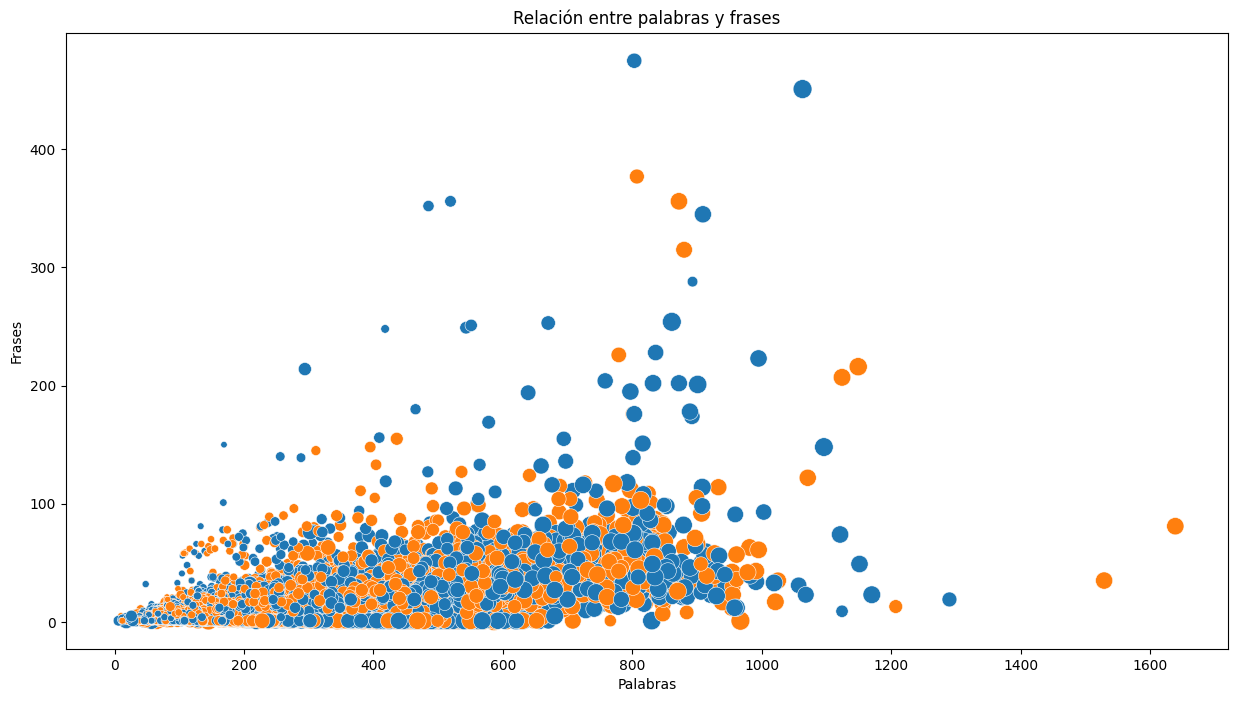

In [238]:
plt.figure(figsize=(15,8))
tips = sns.load_dataset("tips")

# customize the scatter plot
sns.scatterplot(
    x="No_of_Words",
    y="No_of_Sentence",
    hue="target",
    size="No_of_Characters",
    sizes=(10, 200),
    data = df,
    legend=False,
    )


# add labels and title
plt.xlabel("Palabras")
plt.ylabel("Frases")
plt.title("Relación entre palabras y frases")

# display the plot
plt.show()

In [241]:
bad_data = df[(df["No_of_Characters"] > upper_bound)] # 363 Filas totales

In [242]:
bad_data = bad_data.reset_index(drop=True)

In [243]:
print(bad_data)

                                             features  target  \
0   peer group mapping steve kean believe quite st...       1   
1   svn commit: samba r22589 - in branches: SAMBA_...       0   
2   21 st annual energy symposium november 28 29 2...       0   
3   [R] How consistent is predict() syntax? I have...       1   
4   urgent news alert ! ( otcbb : gspm ) gold is h...       0   
5   investigate anyone right browser hello reached...       0   
6   First draft of AGPL v3 Hi all,\nthe first disc...       0   
7   margin only 11 - 05 . xls futures margin requi...       0   
8   Take Up to 30% Off During CDNOW's Storewide Sa...       0   
9   bob johnson storemanager2276msncom _nextpart_8...       1   
10  xiao liang liu nsfzqtjpcnibmcom following arra...       1   
11  [Ximian Updates] (no subject) CAN-2002-0384  h...       0   
12  digital cameras toshiba sony hewlett packard f...       1   
13  astan chee bishcalcomau whopssorry mistake man...       1   
14  apple cknsinsideapple

In [244]:
bad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   features          16 non-null     object
 1   target            16 non-null     int64 
 2   llm               16 non-null     object
 3   ml                16 non-null     object
 4   url               16 non-null     int64 
 5   mail              16 non-null     int64 
 6   No_of_Characters  16 non-null     int64 
 7   No_of_Words       16 non-null     int64 
 8   No_of_Sentence    16 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 1.2+ KB


In [245]:
bad_data.describe()

,target,url,mail,No_of_Characters,No_of_Words,No_of_Sentence
count,16.000000,16.000,16.000000,16.000000,16.000000,16.000000
mean,0.437500,0.375,0.125000,3983.125000,731.500000,92.312500
std,0.512348,0.500,0.341565,195.201392,276.381138,130.464155
min,0.000000,0.000,0.000000,3814.000000,145.000000,1.000000
25%,0.000000,0.000,0.000000,3851.250000,548.250000,1.000000
50%,0.000000,0.000,0.000000,3911.000000,763.000000,21.500000
75%,1.000000,1.000,0.000000,4087.250000,917.500000,161.250000
max,1.000000,1.000,1.000000,4532.000000,1149.000000,451.000000


# Graficas

<Figure size 1200x800 with 0 Axes>

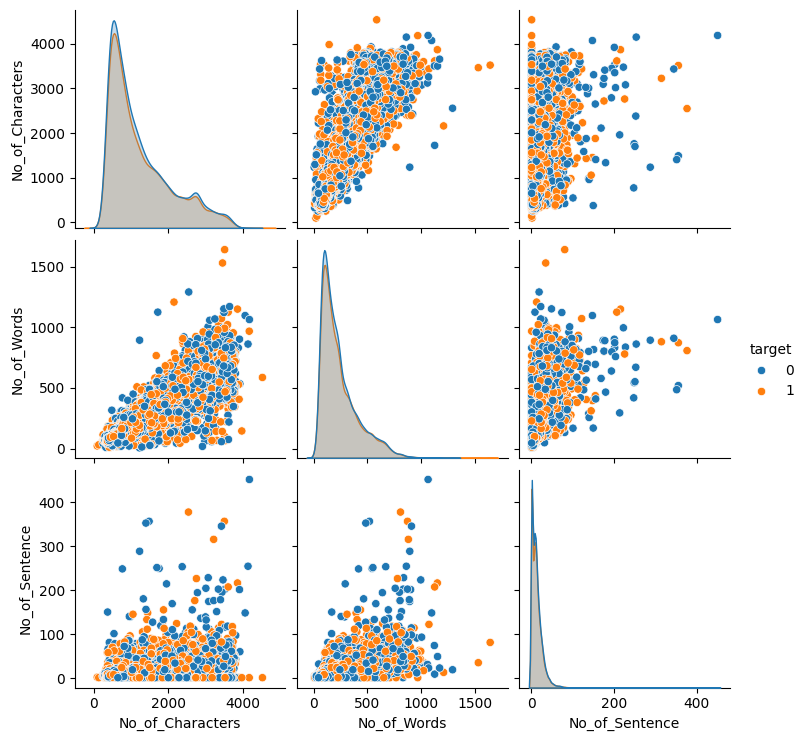

In [246]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(
    data = df,
    hue = "target",
    # palette='Spectral',
    vars = [
        "No_of_Characters",
        "No_of_Words",
        "No_of_Sentence"
        ]
    )
plt.show(fg)

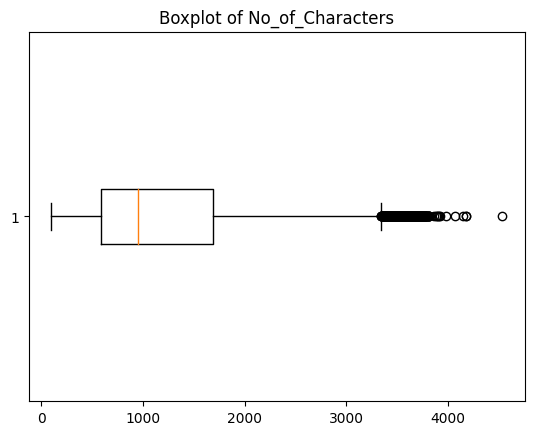

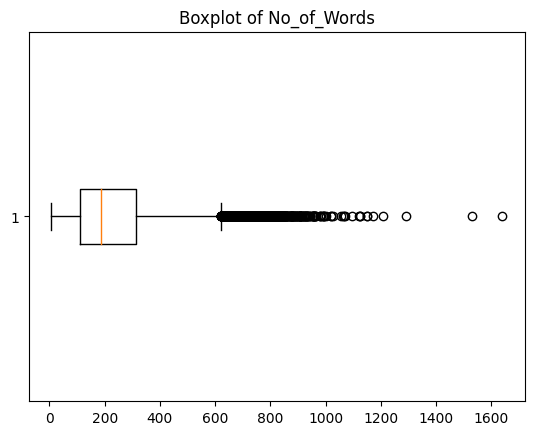

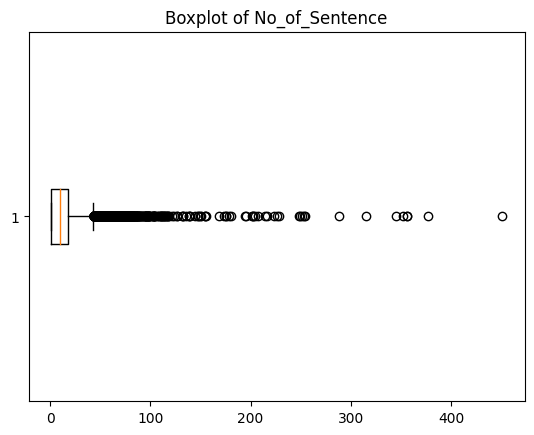

In [247]:
vars = ["No_of_Characters", "No_of_Words", "No_of_Sentence"]
for var in vars:
  plt.boxplot(df[var].dropna(), vert = False)
  plt.title(f'Boxplot of {var}')
  plt.show()

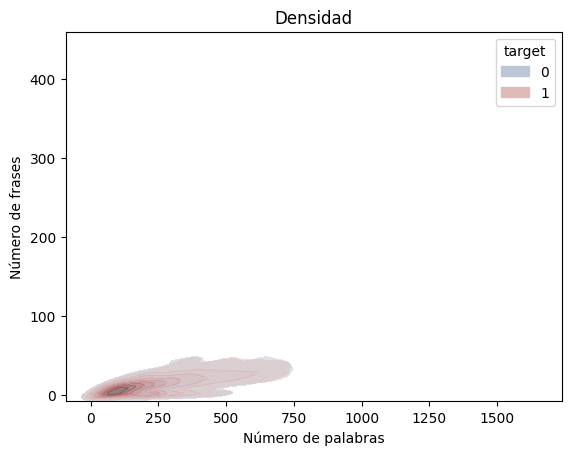

In [249]:
# Load the "tips" dataset from Seaborn
tips = sns.load_dataset("tips")

sns.kdeplot(
    data = df,
    x = "No_of_Words",
    y = "No_of_Sentence",
    hue = "target",
    fill = True,
    alpha = 0.5,
    palette = 'vlag',
    )

# Add a title and labels to the plot using Matplotlib
plt.title("Densidad")
plt.xlabel("Número de palabras")
plt.ylabel("Número de frases")

# Show the plot
plt.show()

In [ ]:
df.describe()

In [250]:
#Dropping the outliers.
data = df[(df["No_of_Characters"] < 3000) & (df["No_of_Characters"] > 31)] # Filas totales 34471
data = data[(data["No_of_Words"] < 600) & (data["No_of_Words"] > 20)] # Filas totales 34464
data = data[(data["No_of_Sentence"] < 50) & (data["No_of_Sentence"] > 3)] # Filas totales 34419
data.shape
data.describe()

,target,url,mail,No_of_Characters,No_of_Words,No_of_Sentence
count,23062.000000,23062.000000,23062.000000,23062.000000,23062.000000,23062.000000
mean,0.483870,0.581389,0.294684,1102.738097,230.746770,14.726433
std,0.499751,0.493342,0.455910,631.634512,131.960389,8.618529
min,0.000000,0.000000,0.000000,239.000000,23.000000,4.000000
25%,0.000000,0.000000,0.000000,596.000000,124.000000,8.000000
50%,0.000000,1.000000,0.000000,915.000000,194.000000,12.000000
75%,1.000000,1.000000,1.000000,1482.000000,313.000000,19.000000
max,1.000000,1.000000,1.000000,2999.000000,599.000000,49.000000


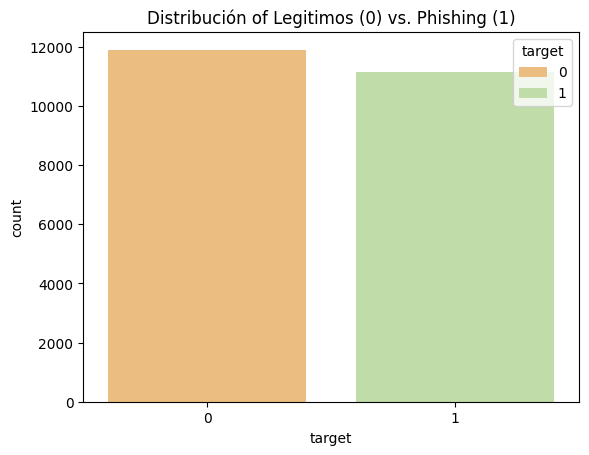

In [252]:
# Distribution of the label column
sns.countplot(
    x = 'target',
    hue = 'target',
    data = data,
    palette = "Spectral",
    )
plt.title('Distribución of Legitimos (0) vs. Phishing (1)')
plt.show()

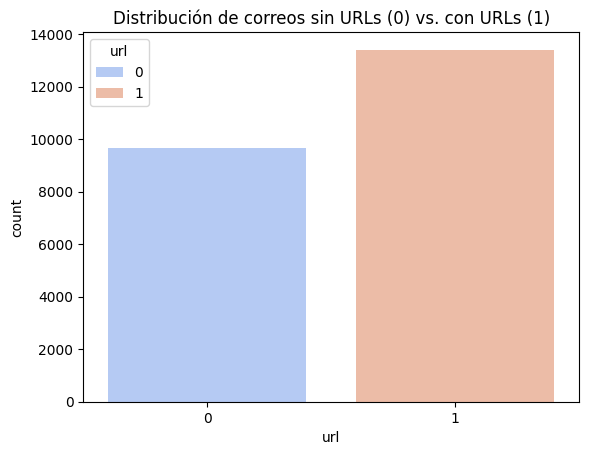

In [253]:
# Distribution of URLs in the emails
sns.countplot(
    x = 'url',
    data = data,
    hue = 'url',
    palette = "coolwarm"
    )
plt.title('Distribución de correos sin URLs (0) vs. con URLs (1)')
plt.show()

<Figure size 1200x800 with 0 Axes>

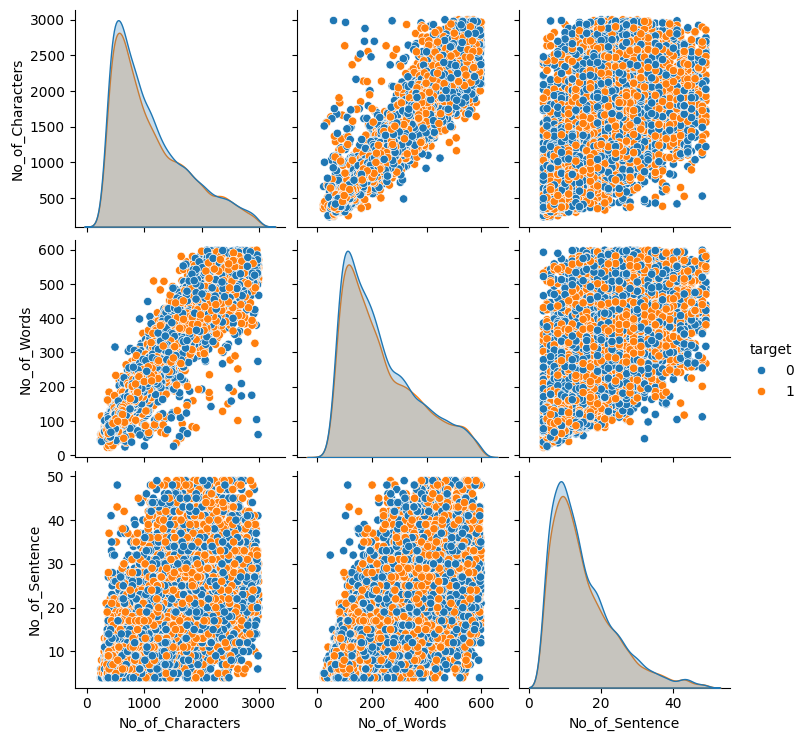

In [255]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(
    data = data,
    hue = "target",
    # palette='Spectral',
    vars = ["No_of_Characters", "No_of_Words", "No_of_Sentence"]
    )
plt.show(fg)

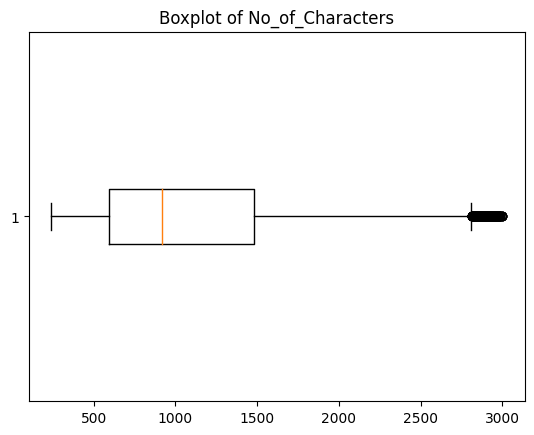

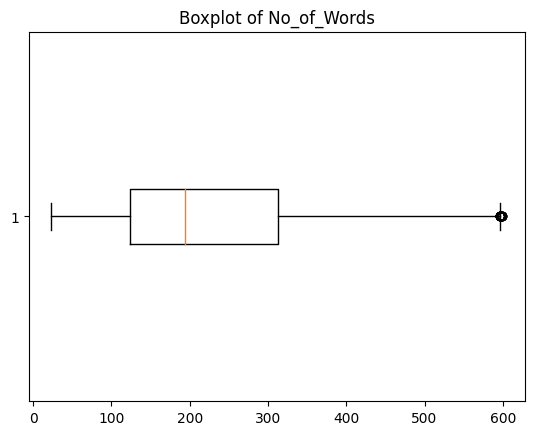

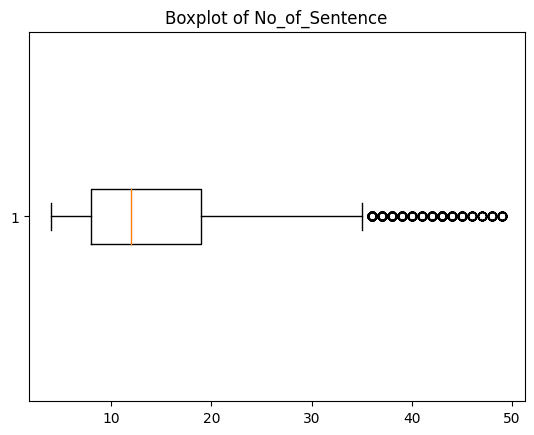

In [256]:
vars = ["No_of_Characters", "No_of_Words", "No_of_Sentence"]
for var in vars:
  plt.boxplot(data[var].dropna(), vert = False)
  plt.title(f'Boxplot of {var}')
  plt.show()

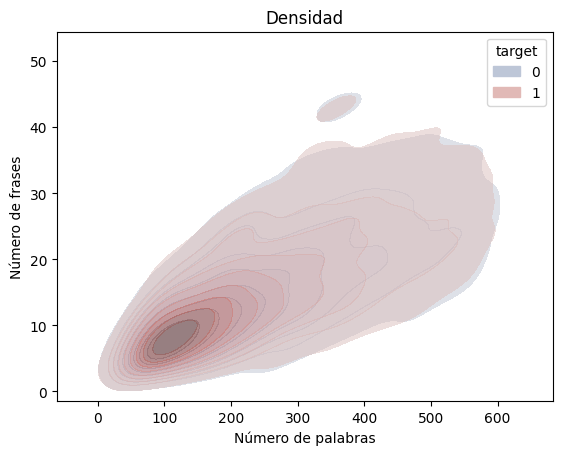

In [258]:
# Load the "tips" dataset from Seaborn
tips = sns.load_dataset("tips")

sns.kdeplot(
    data = data,
    x = "No_of_Words",
    y = "No_of_Sentence",
    hue = "target",
    fill = True,
    alpha = 0.5,
    palette = 'vlag',
    )

# Add a title and labels to the plot using Matplotlib
plt.title("Densidad")
plt.xlabel("Número de palabras")
plt.ylabel("Número de frases")

# Show the plot
plt.show()

In [263]:
phishing_carpos = []
for sentence in data[data['target'] == 1]['ml'].tolist():
    for word in sentence.split():
        if len(word) > 4:
          phishing_carpos.append(word)

In [264]:
from collections import Counter
filter_data = pd.DataFrame(Counter(phishing_carpos).most_common(50))

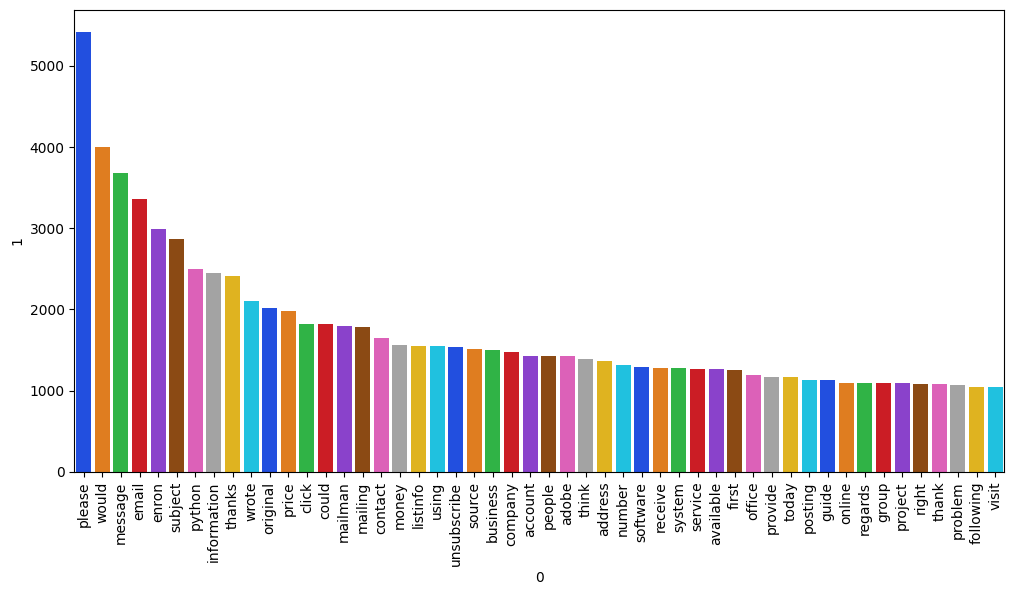

In [265]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data = filter_data,
    x = filter_data[0],
    y = filter_data[1],
    hue = filter_data[0],
    palette = 'bright',
    )
plt.xticks(rotation = 90)
plt.show()

In [266]:
# print(filter_data)

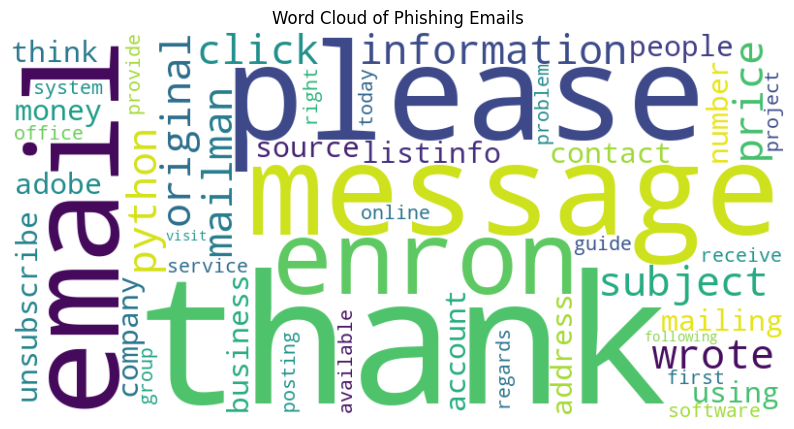

In [267]:
from wordcloud import WordCloud

# Separate spam emails
# spam_emails = df[df['label'] == 1]['ml'].values

# Combine all spam email text
# spam_text = " ".join(spam_emails)
spam_text = " ".join(filter_data[0])


# Generate word cloud
spam_wordcloud = WordCloud (
    width=800,
    height=400,
    background_color='white'
    ).generate(spam_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Phishing Emails')
plt.show()

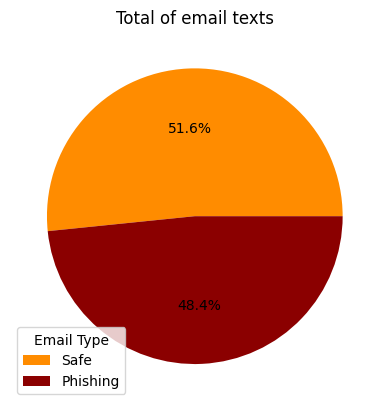

In [270]:
email_type = data['target'].value_counts()

# Pie chart
plt.pie(email_type, colors=['darkorange', 'darkred'], autopct='%1.1f%%')
plt.title('Total of email texts')
plt.legend(['Safe', 'Phishing'], title='Email Type')
plt.show()

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23062 entries, 2 to 35015
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   features          23062 non-null  object
 1   target            23062 non-null  int64 
 2   llm               23062 non-null  object
 3   ml                23062 non-null  object
 4   url               23062 non-null  int64 
 5   mail              23062 non-null  int64 
 6   No_of_Characters  23062 non-null  int64 
 7   No_of_Words       23062 non-null  int64 
 8   No_of_Sentence    23062 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.8+ MB


In [274]:
# Separar características y etiqueta
X = data[['llm', 'ml']]  # Características
y = data['target']  # Etiqueta

In [278]:
# Creamos los datasets
x_train, x_val, x_test, y_train, y_val, y_test = crear_datasets(X, y)

# Ahora puedes utilizar X_train e y_train para entrenar tu modelo,
# X_val e y_val para ajustar los hiperparámetros,
# y X_test e y_test para evaluar el rendimiento final del modelo.


In [279]:
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((16143, 2), (3459, 2), (3460, 2), (16143,), (3459,), (3460,))

# Grabación de los Datos

In [ ]:
data = data.drop_duplicates(subset=['llm'], keep='first')

In [280]:
# Crear el diccionario
data = {
    'train': {
        'features': x_train.to_dict(orient='records'),
        'target': y_train.tolist()
    },
    'validation': {
        'features': x_val.to_dict(orient='records'),
        'target': y_val.tolist()
    },
    'test': {
        'features': x_test.to_dict(orient='records'),
        'target': y_test.tolist()
    }
}

In [281]:
import json
with open('/content/drive/MyDrive/Procesados/today.json', 'w') as f:
    json.dump(data, f)